In [20]:
import os 
import json 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
print(pd.__version__)

1.0.5


# Part 1 - Exploratory data analysis
### Objectives
Aggregate login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand.

In [81]:
with open('logins.json') as f:
    data = json.load(f)
#     print(data.keys())
#     print(data)
    f.close()

In [82]:
# load data into dataframe
login_df = pd.read_json('logins.json').sort_values(by='login_time')
login_df.head()

,login_time
6,1970-01-01 20:12:16
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
3,1970-01-01 20:16:36
2,1970-01-01 20:16:37


In [83]:
print(login_df.iloc[0].dtype)

datetime64[ns]


In [116]:
import datetime as dt

login_df['date'] = login_df.login_time.dt.date
print(login_df.head())
# acquire count of logins in 15 minute intervals 
count_df = login_df.groupby([login_df.login_time.dt.floor('15Min')]).size()
count_df = count_df.reset_index()
# count_df = count_df.set_index('login_time')
count_df.columns = ['login_time','15min_count']


count_df.head()

           login_time        date
6 1970-01-01 20:12:16  1970-01-01
0 1970-01-01 20:13:18  1970-01-01
1 1970-01-01 20:16:10  1970-01-01
3 1970-01-01 20:16:36  1970-01-01
2 1970-01-01 20:16:37  1970-01-01


,login_time,15min_count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


In [127]:
# group daily count by date 
daily_count = login_df.groupby(['date',login_df.login_time.dt.floor('15Min')]).size()
# reset index 
daily_count = daily_count.reset_index()
# rename columns
daily_count.columns = ['date','login_time','login_count']
# extract time
daily_count['time'] = daily_count.login_time.apply(lambda x: dt.datetime.strftime(x,'%H:%M'))
# reorder by time 
daily_count = daily_count.sort_values(by='time')


daily_count.head()

,date,login_time,login_count,time
296,1970-01-05,1970-01-05,8,00:00
5414,1970-03-02,1970-03-02,5,00:00
4127,1970-02-16,1970-02-16,9,00:00
8663,1970-04-06,1970-04-06,6,00:00
1487,1970-01-18,1970-01-18,14,00:00


In [125]:
daily_count.describe()

,login_count
count,9381.000000
mean,9.928792
std,8.263146
min,1.000000
25%,4.000000
50%,8.000000
75%,14.000000
max,73.000000


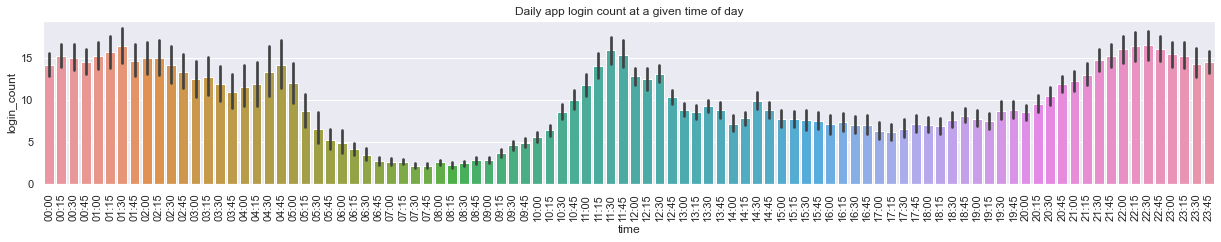

In [130]:
sns.barplot(x='time',y='login_count',data=daily_count)
plt.rcParams["figure.figsize"] = (21,3)
plt.title('Daily app login count at a given time of day')
plt.xticks(rotation=90)
plt.show()

In [146]:
print('Most logins date and time:',daily_count.loc[daily_count['login_count'].idxmax()])
print('Least logins date and time:',daily_count.loc[daily_count['login_count'].idxmin()])
print('Day with Highest average daily login on {}: {}'.format((daily_count.groupby('date')['login_count'].mean().idxmax()),round(daily_count.groupby('date')['login_count'].mean().max(),2)))
# print('Day with lowest average daily login:',daily_count.groupby('date')['login_count'].mean().min())

Most logins date and time: date                    1970-03-01
login_time     1970-03-01 04:30:00
login_count                     73
time                         04:30
Name: 5337, dtype: object
Least logins date and time: date                    1970-03-09
login_time     1970-03-09 01:45:00
login_count                      1
time                         01:45
Name: 6057, dtype: object
Day with Highest average daily login on 1970-04-04: 19.68


#### Observations
Based on the graph, we can see that the app gets the most number of logins at night with sustained login activity between 9pm to 5am. The maximum number of logins recorded was 73 on March 1st at 4:30 am. During work hours between 5:30am to 10am, the activity drops by roughly 33\%, averaging around 3-4 logins.  

###### About Data quality:
It looks like the timestamps were not formatted correctly during the ingestion phase as the timestamps are from start of unix time, which doesn't seem right. 

In [ ]:
challenge_df = pd.read_json('ultimate_data_challenge.json')
challenge_df.head()